
> **ISO2024 INTRODUCTORY SPATIAL 'OMICS ANALYSIS**
>
>
>- HYBRID : TORONTO & ZOOM
>- 9TH JULY 2024 <br>

>**Module 6 : Drawing the boundaries ** <BR>
>
>**Instructor : Shamini Ayyadhury**
>
---

> TOPICS COVERED

* A. Classical segmentation
* B. Segmentation-free

***

```
B. SEGMENTATION-FREE

1. NOW WE WILL PERFORM BAYSOR NON-IMAGE BASED SEGMENTATION
2. BAYSOR IS VERY MEMORY-INTENSIVE - SO WE WILL TEST A TOY DATASET HERE - YES A MUCH SMALLER SAMPLE SIZE THAN THE ALREADY DOWNSIZED TRANSCRIPT SAMPLE.
3. AFTER WHICH, YOU WILL USE THE BAYSOR OUTPUT THAT WE HAVE ALREADY PROCESSED FOR YOU, FOR ALL DOWNSTREAM ANALYSIS

In [1]:
import os
import subprocess
import scanpy as sc
import pandas as pd
import sys

sys.path.append('/home/shamini/data/projects/spatial_workshop/')
import pre_processing_fnc as ppf

In [2]:
### directory & filepaths
data_dir = '/home/shamini/data1/data_orig/data/spatial/xenium/10xGenomics/cell_seg_brain_cancer/'
out = '/home/shamini/data/projects/spatial_workshop/out/module4/'



<<< TOY RUN for DEMO

In [ ]:

# Define the Baysor command with the --save-polygons flag

# get filtered transcript files
### Read in the transcripts_df.csv file from module 2
os.makedirs(out+'module4/objects/baysor_test', exist_ok=True)
os.makedirs(out+'module4/objects/baysor_test/segmentation', exist_ok=True)


command = [
        '/home/shamini/baysor/bin/baysor/bin/baysor', 'run',
        '-c', '/home/shamini/data/projects/spatial_workshop/scripts/module4/parameters_baysor.toml',
        '-s', '9',
        '--save-polygons', 'geojson',
        '-o', os.path.join(out, 'module4/objects/baysor_test/segmentation/'),
        os.path.join(data_dir,'module4/transcripts_subset_all_genes_downsampled.csv')
        ]
subprocess.run(command, check=True)


#----------------------------------------------
ppf.get_memory_usage() ### monitor memory usage

In [ ]:
os.makedirs(out+'module4/objects/baysor_test/ncv', exist_ok=True)


command = [
        '/home/shamini/baysor/bin/baysor/bin/baysor', 'segfree',
        '-c', '/home/shamini/data/projects/spatial_workshop/scripts/module4/parameters_baysor.toml',
        '-o', os.path.join(out, 'module4/objects/baysor_test/ncv/'),
        os.path.join(data_dir,'module4/transcripts_subset_all_genes_downsampled.csv')
        ]
subprocess.run(command, check=True)


#----------------------------------------------
ppf.get_memory_usage() ### monitor memory usage

<<< TOY RUN END

>>> Now we will read in the previously processed baysor segmentation files

In [3]:
#### load baysor output
baysor_seg = pd.read_csv(out+'baysor/segmentation/s18/segmentation.csv')


#----------------------------------------------
ppf.get_memory_usage() ### monitor memory usage


'Memory usage: 1206.01 MB'

In [4]:
baysor_seg['cell_id']

,Column1,transcript_id,cell_id,overlaps_nucleus,gene,x,y,z,qv,fov_name,nucleus_distance,codeword_index,molecule_id,confidence,cluster,cell,assignment_confidence,is_noise,ncv_color
0,157836975,282462819196899,jghlagom-1,0,CTNNB1,0.515625,803.72460,21.914780,40.000000,Z17,0.415854,171,1,0.99252,4,CR7b2508330-564,0.66667,False,#292600
1,157836976,282462819196900,jpcfbjbg-1,0,CTNNB1,0.097656,152.20898,23.486221,40.000000,Z17,0.828315,171,2,0.99904,9,CR7b2508330-18,1.00000,False,#00F4E5
2,157836977,282462819196903,jghbfook-1,0,CTNNB1,0.445312,58.41797,20.532825,40.000000,Z17,0.276219,171,3,0.84880,6,CR7b2508330-2,1.00000,False,#00FFFF
3,157839292,282462819211341,jpcfbjbg-1,0,CD83,0.292969,185.75586,21.277554,40.000000,Z17,0.324890,144,4,0.98966,9,CR7b2508330-18,0.33333,False,#00E3EB
4,157839293,282462819211343,jghcidji-1,1,NOTCH2,0.410156,219.05273,19.567415,40.000000,Z17,0.000000,290,5,0.95479,9,CR7b2508330-31,1.00000,False,#00FFDF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019775,170296968,281513632352448,jlkfdjad-1,0,EDNRB,4704.543000,4312.63300,21.262210,31.155910,AA19,0.309570,427,2019776,0.98498,5,CR7b2508330-33420,1.00000,False,#00DFDF
2019776,170296969,281513632352449,jlgeaoha-1,0,CDK4,4704.789000,4625.78120,22.501923,40.000000,AA19,0.413626,146,2019777,0.21340,8,NaN,0.66667,True,#00F1FF
2019777,170296970,281513632352450,jlkdapch-1,0,SSR4,4705.515600,3806.48630,23.138565,10.575011,AA19,2.230710,294,2019778,0.92981,8,CR7b2508330-32885,1.00000,False,#00CCFF
2019778,170296971,281513632352452,jlkgiamb-1,0,CAV1,4704.578000,4076.34770,22.465912,28.720749,AA19,2.884766,478,2019779,0.99207,2,CR7b2508330-39272,1.00000,False,#513100


In [5]:
baysor_seg['is_noise'].value_counts(normalize=True)

### drop the noise cells
baysor_seg_clean = baysor_seg[baysor_seg['is_noise'] == False]

In [6]:
baysor_seg_clean

,Column1,transcript_id,cell_id,overlaps_nucleus,gene,x,y,z,qv,fov_name,nucleus_distance,codeword_index,molecule_id,confidence,cluster,cell,assignment_confidence,is_noise,ncv_color
0,157836975,282462819196899,jghlagom-1,0,CTNNB1,0.515625,803.72460,21.914780,40.000000,Z17,0.415854,171,1,0.99252,4,CR7b2508330-564,0.66667,False,#292600
1,157836976,282462819196900,jpcfbjbg-1,0,CTNNB1,0.097656,152.20898,23.486221,40.000000,Z17,0.828315,171,2,0.99904,9,CR7b2508330-18,1.00000,False,#00F4E5
2,157836977,282462819196903,jghbfook-1,0,CTNNB1,0.445312,58.41797,20.532825,40.000000,Z17,0.276219,171,3,0.84880,6,CR7b2508330-2,1.00000,False,#00FFFF
3,157839292,282462819211341,jpcfbjbg-1,0,CD83,0.292969,185.75586,21.277554,40.000000,Z17,0.324890,144,4,0.98966,9,CR7b2508330-18,0.33333,False,#00E3EB
4,157839293,282462819211343,jghcidji-1,1,NOTCH2,0.410156,219.05273,19.567415,40.000000,Z17,0.000000,290,5,0.95479,9,CR7b2508330-31,1.00000,False,#00FFDF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019774,170296967,281513632352447,jlkdapch-1,0,PDGFRA,4704.609400,3799.01760,23.134160,40.000000,AA19,0.641113,173,2019775,0.97870,9,CR7b2508330-32885,1.00000,False,#00BBE6
2019775,170296968,281513632352448,jlkfdjad-1,0,EDNRB,4704.543000,4312.63300,21.262210,31.155910,AA19,0.309570,427,2019776,0.98498,5,CR7b2508330-33420,1.00000,False,#00DFDF
2019777,170296970,281513632352450,jlkdapch-1,0,SSR4,4705.515600,3806.48630,23.138565,10.575011,AA19,2.230710,294,2019778,0.92981,8,CR7b2508330-32885,1.00000,False,#00CCFF
2019778,170296971,281513632352452,jlkgiamb-1,0,CAV1,4704.578000,4076.34770,22.465912,28.720749,AA19,2.884766,478,2019779,0.99207,2,CR7b2508330-39272,1.00000,False,#513100


In [7]:
import seaborn as sns

In [20]:
baysor_seg_clean['assignment_confidence'].value_counts(normalize=True)

assignment_confidence
1.00000    0.590107
0.66667    0.318020
0.33333    0.091873
Name: proportion, dtype: float64

In [29]:
### get rid of cells with low assignment confidence
baysor_seg_clean = baysor_seg_clean[baysor_seg_clean['assignment_confidence'] > 0.7]

In [30]:
baysor_seg_clean['assignment_confidence'].value_counts(normalize=True)

assignment_confidence
1.0    1.0
Name: proportion, dtype: float64

In [31]:

print(f" Baysor segmentation derived cells : {baysor_seg_clean['cell'].nunique()}")
print(f" Original number of cells from xenium segmentation : {baysor_seg['cell_id'].nunique()}")


 Baysor segmentation derived cells : 53782
 Original number of cells from xenium segmentation : 8163


In [32]:
### subset the same genes as before , PTPCR, ANXA1, STMN1

genes = ['PTPRC', 'ANXA1', 'STMN1']
baysor_seg_genes = baysor_seg_clean[baysor_seg_clean['gene'].isin(genes)]
baysor_seg_genes.head(10)

,Column1,transcript_id,cell_id,overlaps_nucleus,gene,x,y,z,qv,fov_name,nucleus_distance,codeword_index,molecule_id,confidence,cluster,cell,assignment_confidence,is_noise,ncv_color
18255,161303730,282462819324349,jgjmlafd-1,1,STMN1,2.453125,842.318360,24.927584,34.959274,Z17,0.000000,345,18256,0.99904,4,CR7b2508330-616,1.0,False,#252300
18275,161303750,282462819324390,jgjmlafd-1,1,STMN1,8.214844,837.609400,19.900593,38.238132,Z17,0.000000,345,18276,0.99943,4,CR7b2508330-616,1.0,False,#282300
18300,161303775,282462819324463,jghjgdmd-1,1,PTPRC,15.496094,1008.177730,22.523070,10.997031,Z17,0.000000,203,18301,0.99963,3,CR7b2508330-827,1.0,False,#00C5FF
18301,161303776,282462819324464,jgjphgen-1,0,PTPRC,15.292969,1090.507800,22.094370,23.334747,Z17,0.564053,203,18302,0.99933,3,CR7b2508330-933,1.0,False,#00CFFF
18340,161303815,282462819324549,jghblpkc-1,1,STMN1,24.691406,311.775400,22.638409,37.400547,Z17,0.000000,345,18341,0.99940,6,CR7b2508330-85,1.0,False,#00DEFF
18346,161303821,282462819324566,jghcckif-1,1,PTPRC,26.722656,175.408200,22.196743,23.993670,Z17,0.000000,203,18347,0.99958,3,CR7b2508330-35,1.0,False,#00C9FF
18369,161303844,282462819324606,jghjfiol-1,1,PTPRC,32.843750,1039.160200,21.938034,15.823977,Z17,0.000000,203,18370,0.99957,3,CR7b2508330-957,1.0,False,#00C7FF
18370,161303845,282462819324608,jghcnaik-1,0,PTPRC,32.339844,127.660160,20.762442,40.000000,Z17,1.396907,203,18371,0.99922,3,CR7b2508330-20,1.0,False,#00EAFF
18384,161303859,282462819324643,jghbfook-1,0,STMN1,36.207030,38.529297,22.055983,40.000000,Z17,0.225975,345,18385,0.99706,6,CR7b2508330-2,1.0,False,#00FFFF
18386,161303861,282462819324647,jghblake-1,1,STMN1,36.898438,296.589840,20.802345,39.587856,Z17,0.000000,345,18387,0.99963,6,CR7b2508330-92,1.0,False,#00EFF9


In [33]:

cells_stmn1 = baysor_seg_genes['cell_id'][baysor_seg_genes['gene']=='STMN1'].unique()
cells_anxa1 = baysor_seg_genes['cell_id'][baysor_seg_genes['gene']=='ANXA1'].unique()
cells_ptprc = baysor_seg_genes['cell_id'][baysor_seg_genes['gene']=='PTPRC'].unique()

### cells expressing all 3 genes
cells_all = set(cells_stmn1) & set(cells_anxa1) & set(cells_ptprc)

### cells expressing stmn1 & anxa1
cells_stmn1_anxa1 = set(cells_stmn1) & set(cells_anxa1)

### cells expressing stmn1 & ptprc
cells_stmn1_ptprc = set(cells_stmn1) & set(cells_ptprc)

### cells expressing anxa1 & ptprc
cells_anxa1_ptprc = set(cells_anxa1) & set(cells_ptprc)

print(f" Number of cells expressing all 3 genes is {len(cells_all)}")
print(f" Number of cells expressing STMN1 and ANXA1 is {len(cells_stmn1_anxa1)}")
print(f" Number of cells expressing STMN1 and PTPRC is {len(cells_stmn1_ptprc)}")
print(f" Number of cells expressing ANXA1 and PTPRC is {len(cells_anxa1_ptprc)}")

### print cells expressing single genes
print(f" Number of cells expressing STMN1 is {len(cells_stmn1)}")
print(f" Number of cells expressing ANXA1 is {len(cells_anxa1)}")
print(f" Number of cells expressing PTPRC is {len(cells_ptprc)}")

 Number of cells expressing all 3 genes is 188
 Number of cells expressing STMN1 and ANXA1 is 1378
 Number of cells expressing STMN1 and PTPRC is 625
 Number of cells expressing ANXA1 and PTPRC is 281
 Number of cells expressing STMN1 is 5114
 Number of cells expressing ANXA1 is 2180
 Number of cells expressing PTPRC is 960


In [34]:
### repeat with baysor cell centers
cells_stmn1_b = baysor_seg_genes['cell'][baysor_seg_genes['gene']=='STMN1'].unique()
cells_anxa1_b = baysor_seg_genes['cell'][baysor_seg_genes['gene']=='ANXA1'].unique()
cells_ptprc_b = baysor_seg_genes['cell'][baysor_seg_genes['gene']=='PTPRC'].unique()

### cells expressing all 3 genes
cells_all_b = set(cells_stmn1_b) & set(cells_anxa1_b) & set(cells_ptprc_b)

### cells expressing stmn1 & anxa1
cells_stmn1_anxa1_b = set(cells_stmn1_b) & set(cells_anxa1_b)

### cells expressing stmn1 & ptprc
cells_stmn1_ptprc_b = set(cells_stmn1_b) & set(cells_ptprc_b)

### cells expressing anxa1 & ptprc
cells_anxa1_ptprc_b = set(cells_anxa1_b) & set(cells_ptprc_b)

print(f" Number of cells expressing all 3 genes is {len(cells_all_b)}")
print(f" Number of cells expressing STMN1 and ANXA1 is {len(cells_stmn1_anxa1_b)}")
print(f" Number of cells expressing STMN1 and PTPRC is {len(cells_stmn1_ptprc_b)}")
print(f" Number of cells expressing ANXA1 and PTPRC is {len(cells_anxa1_ptprc_b)}")

### print cells expressing single genes
print(f" Number of cells expressing STMN1 is {len(cells_stmn1_b)}")
print(f" Number of cells expressing ANXA1 is {len(cells_anxa1_b)}")
print(f" Number of cells expressing PTPRC is {len(cells_ptprc_b)}")



 Number of cells expressing all 3 genes is 60
 Number of cells expressing STMN1 and ANXA1 is 781
 Number of cells expressing STMN1 and PTPRC is 374
 Number of cells expressing ANXA1 and PTPRC is 146
 Number of cells expressing STMN1 is 8798
 Number of cells expressing ANXA1 is 3066
 Number of cells expressing PTPRC is 1140


In [35]:
### old and new segmentation files

import json

with open(out+'baysor/segmentation/s18/segmentation_polygons.json') as f:
    baysor_boundaries = json.load(f)

orig_boundaries = pd.read_csv(out+'cell_boundaries_subset.csv')


In [50]:
### filter json file
baysor_boundaries_filtered = [geom for geom in baysor_boundaries['geometries'] if geom['cell'] in baysor_seg_clean['cell'].unique()]
baysor_boundaries_filtered

Shape of iF_crop: (4, 4705, 4705)
Channel 0 max: 9350, min: 6
Channel 1 max: 10806, min: 0
Channel 2 max: 10972, min: 2
Channel 3 max: 8295, min: 0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.6224868].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.6224868].


'Memory usage: 4802.52 MB'

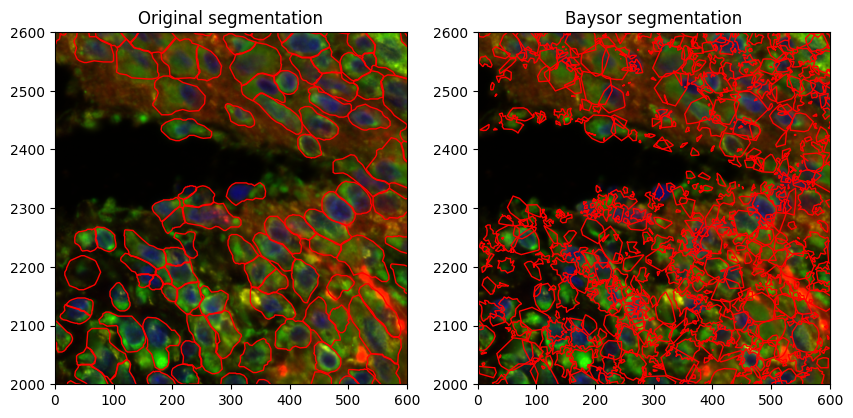

In [36]:
### plotting the segmentation results
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import tifffile as tiff


iF_crop = tiff.imread(data_dir+'module4/cropped_image_fluo.tif')
composite_image = ppf.plot_composite_image(iF_crop)


fig, ax = plt.subplots(1, 2, figsize=(10, 10))

xlower = 0
ylower = 2000
xlim = [xlower, xlower+600]
ylim = [ylower, ylower+600]

### plot the original segmentation

ax[0].imshow(composite_image)

grouped = orig_boundaries.groupby('cell_id')

for cell_id, group in grouped:
    group = pd.concat([group, group.iloc[:1]])
    plg = Polygon(group[['vertex_x', 'vertex_y']].values, edgecolor='red', facecolor='none')
    ax[0].add_patch(plg)

ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)
ax[0].set_title('Original segmentation')


### now plot tje baysor segmentation which is a json file
ax[1].imshow(composite_image)


for cell in baysor_boundaries_filtered['geometries']:
    plg = cell['coordinates'][0]
    plg.append(plg[0])
    plg = Polygon(plg, edgecolor='red', facecolor='none', closed=True)
    ax[1].add_patch(plg)
    ax[1].set_xlim(xlim)
    ax[1].set_ylim(ylim)
ax[1].set_title('Baysor segmentation')
     

#----------------------------------------------
ppf.get_memory_usage() ### monitor memory usage

In [ ]:
baysor_seg